In [1]:
#Load date.csv
import pandas as pd
df_fish = pd.read_csv('https://github.com/WHPAN0108/BHT-DataScience-S23/blob/main/regression/data/Fish.csv?raw=true')
df_fish.shape

(159, 7)

In [2]:
df_fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


<h1> Part 1: Data Analysis and Clean</h1>

Species: species name of fish </br>
Length1: vertical length in cm</br>
Length2: diagonal length in cm</br>
Length3: cross length in cm</br>
Height: height in cm</br>
Width: diagonal width in cm</br>
Weight: weight of fish in Gram g</br>

Clean the data before the analysis if necessary -> was not found to be necessary

In [3]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df_fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
df_fish.count()

Species    159
Weight     159
Length1    159
Length2    159
Length3    159
Height     159
Width      159
dtype: int64

In [6]:
df_fish.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

<Axes: >

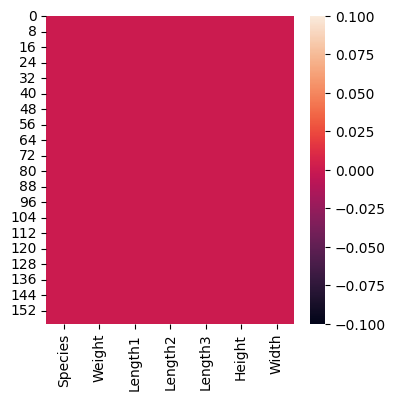

In [7]:
import matplotlib.pyplot  as plt 
import seaborn as sns
plt.figure(figsize=[4, 4])
sns.heatmap( df_fish.isna()) #at this point I'm pretty confident there is no na value here

In [8]:
df_fish.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [9]:
df_fish['Weight']

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

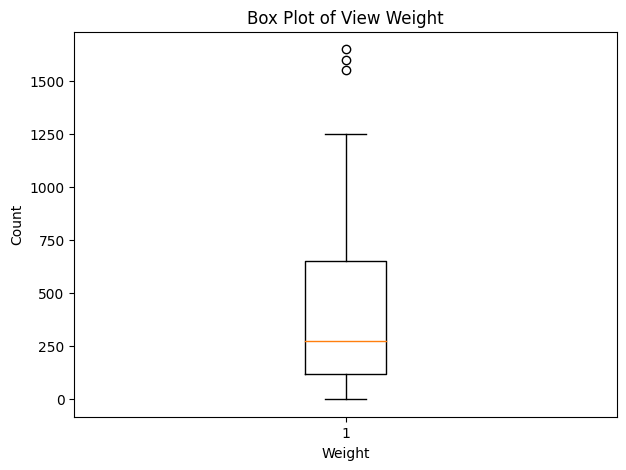

In [10]:
# Create a box plot
plt.figure(figsize=[7,5])
plt.boxplot(df_fish['Weight'])

# Add labels and title
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Box Plot of View Weight')

# Show the plot
plt.show()

In [11]:
print("chonkiest fish = ",max(df_fish['Weight']))

chonkiest fish =  1650.0


<Axes: xlabel='Weight', ylabel='Length1'>

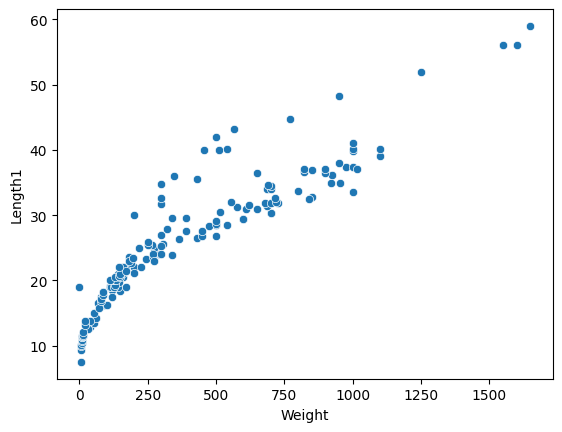

In [12]:
plt.figure()
sns.scatterplot(x='Weight',y='Length1',data=df_fish)

# detected 3 outlier values which I think are reasonable though, might be just very chonky fish

<Axes: xlabel='Species', ylabel='Weight'>

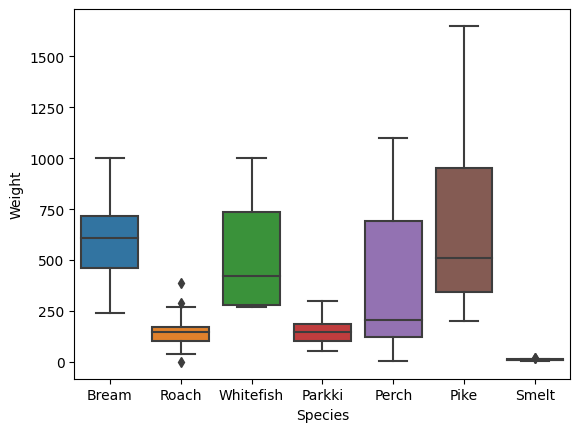

In [13]:

sns.boxplot(x='Species', y='Weight', data=df_fish)
#seems fine, smelt is a very small fish, weights do not vary in a reasonable amount

In [14]:
species_unique=df_fish['Species'].unique()
species_unique

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [15]:
# weight correlation matrix

corr = df_fish.drop('Species', axis=1).corr()
k = 7 #number of columns for heatmap
cols = corr.nlargest(k, 'Weight')['Weight'].index
cols



Index(['Weight', 'Length3', 'Length2', 'Length1', 'Width', 'Height'], dtype='object')

In [16]:
import numpy as np
cm = np.corrcoef(df_fish[cols].values.T)
cm

array([[1.        , 0.92304356, 0.9186177 , 0.91571172, 0.88650661,
        0.72434533],
       [0.92304356, 1.        , 0.99410263, 0.99203099, 0.87852016,
        0.70340895],
       [0.9186177 , 0.99410263, 1.        , 0.99951727, 0.87354668,
        0.6404408 ],
       [0.91571172, 0.99203099, 0.99951727, 1.        , 0.86704972,
        0.62537792],
       [0.88650661, 0.87852016, 0.87354668, 0.86704972, 1.        ,
        0.79288102],
       [0.72434533, 0.70340895, 0.6404408 , 0.62537792, 0.79288102,
        1.        ]])

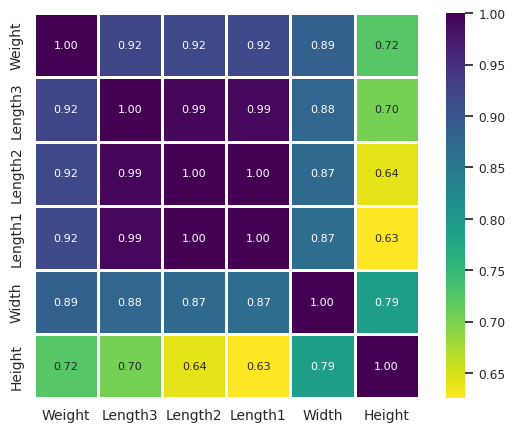

In [17]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,5))
    sns.set(font_scale=0.8)
    ax = sns.heatmap(cm,cbar=True, square=True, annot=True,fmt='0.2f',linewidths=.8,
                     cmap="viridis_r", annot_kws={'size': 8}, yticklabels=cols.values,
                     xticklabels=cols.values)

# very high correlations detected!
Length1,2,3 almost the same ~100% </br>
Height does not seem to depend that much on the other values</br>
good correlation between Weight and: Length1,2,3 (0.92), Width (0.89) and Height (0.72) ->prediction has chances of success


---
# Part 2: Machine Learning

# randomly split data

In [18]:
#split data randomly
from sklearn.model_selection import train_test_split

x = df_fish.drop('Weight', axis=1)
y = df_fish['Weight']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train

,Species,Length1,Length2,Length3,Height,Width
18,Bream,30.9,33.5,38.6,15.6330,5.1338
108,Perch,27.8,30.0,31.6,7.6156,4.7716
30,Bream,35.0,38.5,44.1,18.0369,6.3063
73,Perch,12.5,13.7,14.7,3.5280,1.9992
156,Smelt,12.1,13.0,13.8,2.2770,1.2558
...,...,...,...,...,...,...
9,Bream,28.5,30.7,36.2,14.2266,4.9594
103,Perch,25.4,27.5,28.9,7.1672,4.3350
67,Parkki,19.0,20.7,23.2,9.3960,3.4104
117,Perch,36.5,39.0,41.4,11.1366,6.0030


In [19]:
print("Test Data = ",x_test.shape)
print("Train Data = ",x_train.shape)
print("Target Train = ",y_train.shape)
print("Target Test = ",y_test.shape)

Test Data =  (48, 6)
Train Data =  (111, 6)
Target Train =  (111,)
Target Test =  (48,)


In [20]:
y_train

18     610.0
108    320.0
30     920.0
73      32.0
156     12.2
       ...  
9      500.0
103    260.0
67     170.0
117    650.0
47     160.0
Name: Weight, Length: 111, dtype: float64

# One-hot encoding to use Species column


In [21]:
# One-hot encoding
x_train = pd.get_dummies(x_train, columns=['Species'])
x_test = pd.get_dummies(x_test, columns=['Species'])
x_train

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
18,30.9,33.5,38.6,15.6330,5.1338,True,False,False,False,False,False,False
108,27.8,30.0,31.6,7.6156,4.7716,False,False,True,False,False,False,False
30,35.0,38.5,44.1,18.0369,6.3063,True,False,False,False,False,False,False
73,12.5,13.7,14.7,3.5280,1.9992,False,False,True,False,False,False,False
156,12.1,13.0,13.8,2.2770,1.2558,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9,28.5,30.7,36.2,14.2266,4.9594,True,False,False,False,False,False,False
103,25.4,27.5,28.9,7.1672,4.3350,False,False,True,False,False,False,False
67,19.0,20.7,23.2,9.3960,3.4104,False,True,False,False,False,False,False
117,36.5,39.0,41.4,11.1366,6.0030,False,False,True,False,False,False,False


# standard scaling

In [22]:
from sklearn.preprocessing import StandardScaler 
# Standard Scaler
std_scale = StandardScaler()
X_train = std_scale.fit_transform(x_train)
#X_train = pd.DataFrame(X_train, columns=df.columns)

X_test = std_scale.transform(x_test)
#X_test = pd.DataFrame(X_test, columns=df.columns)

# Linear regression model

In [23]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [24]:
pred = LR.predict(X_test)
pred

array([ 397.95448408,  129.73611473,  209.04102524,  210.16019937,
        686.38064149,  872.32788233,  663.39415241,  419.50297878,
       1004.46289122,  142.00827627,  286.61124419,  525.68652152,
        719.58630018, 1017.54674762, -114.78767247,   26.88127378,
        163.9706359 ,  957.00081915,  182.99388776,  733.16938179,
       -103.66185149,  511.57632765,  168.02887639, 1126.05942468,
        -25.85713411,  477.0432793 ,  707.60331789,  240.51768894,
        888.25879301,   13.76772836,  585.88618243,  166.43036365,
        957.00081915,  343.15302525,  579.89225046,  270.64026817,
        377.03857408,  652.18899153,  707.90121252,  161.16410198,
        655.892628  ,  -98.43936493,  224.9093039 ,  755.54688342,
        145.87863781,  280.93851751,  230.81178722,  289.39592699])

In [25]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('LinearRegression r2_score :', r2_score(y_test, pred))
print('LinearRegression MSE_score :', mean_squared_error(y_test, pred, squared=True))
print('LinearRegression RMSE_score :', mean_squared_error(y_test, pred, squared=False))

LinearRegression r2_score : 0.8315527837143363
LinearRegression MSE_score : 29394.072717808118
LinearRegression RMSE_score : 171.44699681769907


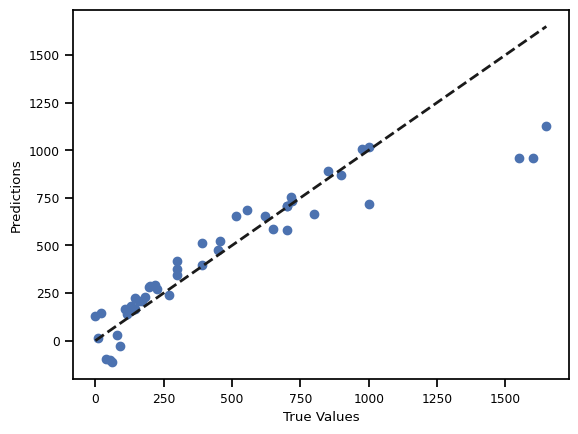

In [26]:
# Plot predictions vs true values
plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# random forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(random_state=0)
RF.fit(X_train, y_train)

pred2 = RF.predict(X_test)

print('RandomForest r2_score:', r2_score(y_test, pred2))
print('RandomForest MSE:', mean_squared_error(y_test, pred2, squared=True))
print('RandomForest RMSE:', mean_squared_error(y_test, pred2, squared=False))

RandomForest r2_score: 0.8456802727944839
RandomForest MSE: 26928.82306572917
RandomForest RMSE: 164.10003981026077


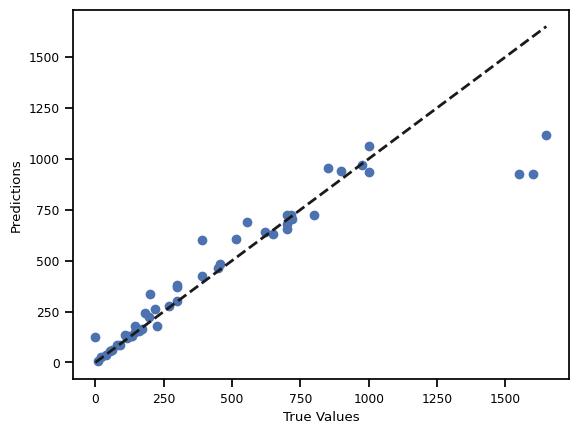

In [28]:
import matplotlib.pyplot as plt

# Plot predictions vs true values
plt.scatter(y_test, pred2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# results
random forest works better. The 3 outlier values that we detected previously contribute to a great margin of error though.
Here is how the models do when we exclude the very heavy fish:

---
# Without outliers

In [29]:
df_fish_clean = df_fish[df_fish['Weight'] <= 1500]
df_fish_clean

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [30]:
#split data randomly
from sklearn.model_selection import train_test_split

x = df_fish_clean.drop('Weight', axis=1)
y = df_fish_clean['Weight']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train

,Species,Length1,Length2,Length3,Height,Width
60,Whitefish,37.3,40.0,43.5,12.3540,6.5250
2,Bream,23.9,26.5,31.1,12.3778,4.6961
145,Smelt,9.3,9.8,10.8,1.7388,1.0476
43,Roach,20.4,22.0,24.7,5.8045,3.7544
66,Parkki,19.0,20.7,23.2,8.5376,3.2944
...,...,...,...,...,...,...
9,Bream,28.5,30.7,36.2,14.2266,4.9594
103,Perch,25.4,27.5,28.9,7.1672,4.3350
67,Parkki,19.0,20.7,23.2,9.3960,3.4104
117,Perch,36.5,39.0,41.4,11.1366,6.0030


In [31]:
# One-hot encoding
x_train = pd.get_dummies(x_train, columns=['Species'])
x_test = pd.get_dummies(x_test, columns=['Species'])
x_train

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
60,37.3,40.0,43.5,12.3540,6.5250,False,False,False,False,False,False,True
2,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
145,9.3,9.8,10.8,1.7388,1.0476,False,False,False,False,False,True,False
43,20.4,22.0,24.7,5.8045,3.7544,False,False,False,False,True,False,False
66,19.0,20.7,23.2,8.5376,3.2944,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9,28.5,30.7,36.2,14.2266,4.9594,True,False,False,False,False,False,False
103,25.4,27.5,28.9,7.1672,4.3350,False,False,True,False,False,False,False
67,19.0,20.7,23.2,9.3960,3.4104,False,True,False,False,False,False,False
117,36.5,39.0,41.4,11.1366,6.0030,False,False,True,False,False,False,False


In [32]:
from sklearn.preprocessing import StandardScaler 
# Standard Scaler
std_scale = StandardScaler()
X_train = std_scale.fit_transform(x_train)
#X_train = pd.DataFrame(X_train, columns=df.columns)

X_test = std_scale.transform(x_test)
#X_test = pd.DataFrame(X_test, columns=df.columns)

In [33]:
LR = LinearRegression()
LR.fit(X_train,y_train)

pred = LR.predict(X_test)

print('LinearRegression r2_score on data without outliers:', r2_score(y_test, pred))
print('LinearRegression MSE_score on data without outliers:', mean_squared_error(y_test, pred, squared=True))
print('LinearRegression RMSE_score on data without outliers:', mean_squared_error(y_test, pred, squared=False))

LinearRegression r2_score on data without outliers: 0.9300546101769231
LinearRegression MSE_score on data without outliers: 5873.107306460024
LinearRegression RMSE_score on data without outliers: 76.63620101792641


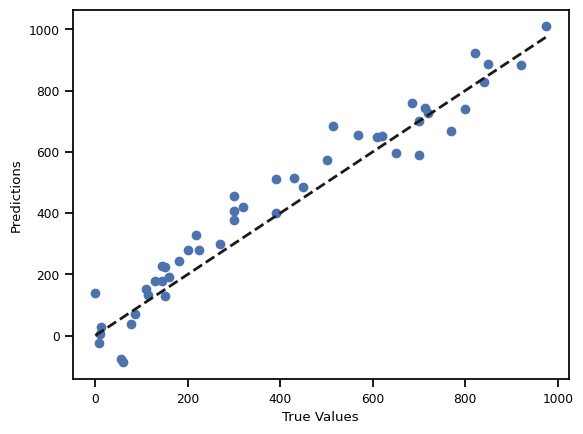

In [34]:
# Plot predictions vs true values
plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [35]:
RF = RandomForestRegressor(random_state=0)
RF.fit(X_train, y_train)

pred2 = RF.predict(X_test)

print('RandomForest r2_score on data without outliers:', r2_score(y_test, pred2))
print('RandomForest MSE on data without outliers:', mean_squared_error(y_test, pred2, squared=True))
print('RandomForest RMSE on data without outliers:', mean_squared_error(y_test, pred2, squared=False))

RandomForest r2_score on data without outliers: 0.9624513318638677
RandomForest MSE on data without outliers: 3152.8504985957456
RandomForest RMSE on data without outliers: 56.150249319088026


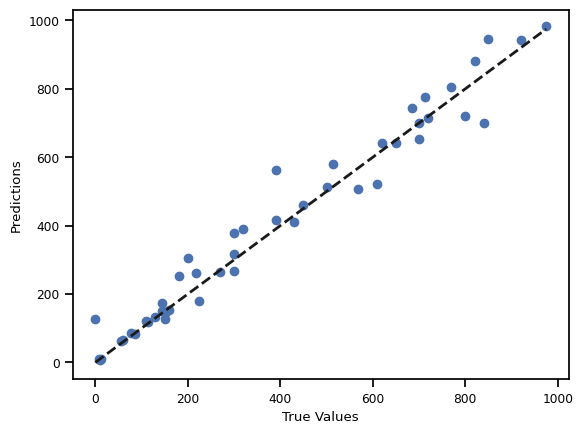

In [36]:
plt.scatter(y_test, pred2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# results on data without outliers
even better, really good. improved both models as expected

---
# 70/30 split for each species

In [37]:
 # from sklearn.model_selection import GroupShuffleSplit # use this to split so that each set contains different groups
 # from sklearn.model_selection import StratifiedShuffleSplit #doesn't work because of ValueError: The least populated class in y has only 1 member, which is too few. 

#so we do it manually
train_dfs = []
test_dfs = []

for species in df_fish_clean['Species'].unique():
    df_species = df_fish_clean[df_fish_clean['Species'] == species]
    train_species = df_species.sample(frac=0.7, random_state=0)
    test_species = df_species.drop(train_species.index)
    train_dfs.append(train_species)
    test_dfs.append(test_species)

x_train = pd.concat(train_dfs)
x_test = pd.concat(test_dfs)

x_train

,Species,Weight,Length1,Length2,Length3,Height,Width
29,Bream,1000.0,33.5,37.0,42.6,18.9570,6.6030
20,Bream,575.0,31.3,34.0,39.5,15.1285,5.5695
16,Bream,700.0,30.4,33.0,38.3,14.8604,5.2854
28,Bream,850.0,32.8,36.0,41.6,16.8896,6.1984
22,Bream,620.0,31.5,34.5,39.7,15.5227,5.2801
...,...,...,...,...,...,...,...
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659


In [38]:
# Count the number of fish of each species in the training set
species_counts_train = x_train['Species'].value_counts()
species_counts_train

Species
Perch        39
Bream        24
Roach        14
Pike         10
Smelt        10
Parkki        8
Whitefish     4
Name: count, dtype: int64

In [39]:
# Count the number of fish of each species in the test set
species_counts_test = x_test['Species'].value_counts()
species_counts_test

Species
Perch        17
Bream        11
Roach         6
Pike          4
Smelt         4
Parkki        3
Whitefish     2
Name: count, dtype: int64

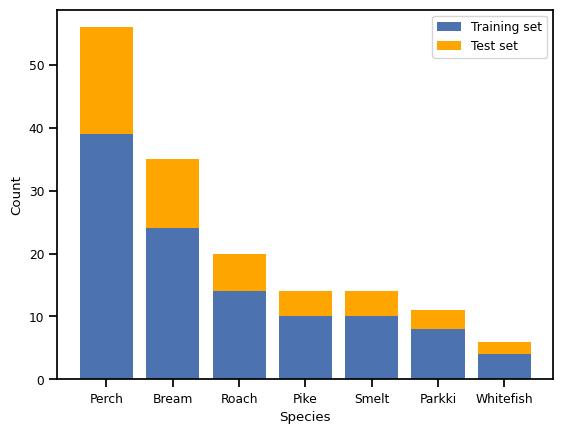

In [40]:
import matplotlib.pyplot as plt

# Create a stacked bar plot
fig, ax = plt.subplots()
ax.bar(species_counts_train.index, species_counts_train.values, label='Training set')
ax.bar(species_counts_test.index, species_counts_test.values, bottom=species_counts_train.values, label='Test set', color='orange')
ax.set_xlabel('Species')
ax.set_ylabel('Count')
ax.legend()
plt.show()

# Machine learning on clean 70/30 split for each Species

In [41]:
# One-hot encoding
x_train = pd.get_dummies(x_train, columns=['Species'])
x_test = pd.get_dummies(x_test, columns=['Species'])
x_train

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
29,1000.0,33.5,37.0,42.6,18.9570,6.6030,True,False,False,False,False,False,False
20,575.0,31.3,34.0,39.5,15.1285,5.5695,True,False,False,False,False,False,False
16,700.0,30.4,33.0,38.3,14.8604,5.2854,True,False,False,False,False,False,False
28,850.0,32.8,36.0,41.6,16.8896,6.1984,True,False,False,False,False,False,False
22,620.0,31.5,34.5,39.7,15.5227,5.2801,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,19.9,13.8,15.0,16.2,2.9322,1.8792,False,False,False,False,False,True,False
154,12.2,11.5,12.2,13.4,2.0904,1.3936,False,False,False,False,False,True,False
146,7.5,10.0,10.5,11.6,1.9720,1.1600,False,False,False,False,False,True,False
152,9.9,11.3,11.8,13.1,2.2139,1.1659,False,False,False,False,False,True,False


In [42]:
# Create y_train and y_test
y_train = x_train.pop('Weight')
y_test = x_test.pop('Weight')

In [43]:
from sklearn.preprocessing import StandardScaler 
# Standard Scaler
std_scale = StandardScaler()
X_train = std_scale.fit_transform(x_train)
#X_train = pd.DataFrame(X_train, columns=df.columns)

X_test = std_scale.transform(x_test)
#X_test = pd.DataFrame(X_test, columns=df.columns)

In [44]:
LR = LinearRegression()
LR.fit(X_train,y_train)

pred3 = LR.predict(X_test)

print('LinearRegression r2_score on data without outliers:', r2_score(y_test, pred3))
print('LinearRegression MSE_score on data without outliers:', mean_squared_error(y_test, pred3, squared=True))
print('LinearRegression RMSE_score on data without outliers:', mean_squared_error(y_test, pred3, squared=False))

LinearRegression r2_score on data without outliers: 0.9080642129344261
LinearRegression MSE_score on data without outliers: 9871.507536069008
LinearRegression RMSE_score on data without outliers: 99.35546052466874


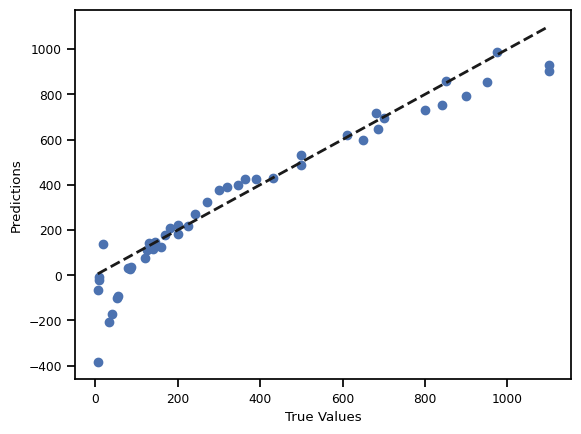

In [45]:
# Plot predictions vs true values
plt.scatter(y_test, pred3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [46]:
RF = RandomForestRegressor(random_state=0)
RF.fit(X_train, y_train)

pred4 = RF.predict(X_test)

print('RandomForest r2_score on data without outliers:', r2_score(y_test, pred4))
print('RandomForest MSE on data without outliers:', mean_squared_error(y_test, pred4, squared=True))
print('RandomForest RMSE on data without outliers:', mean_squared_error(y_test, pred4, squared=False))

RandomForest r2_score on data without outliers: 0.9744742422792084
RandomForest MSE on data without outliers: 2740.801136829787
RandomForest RMSE on data without outliers: 52.3526612201308


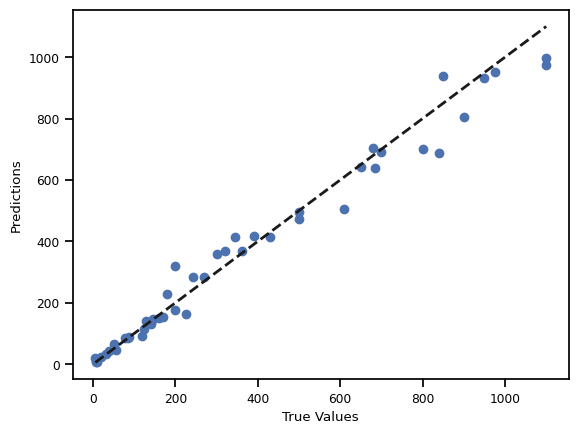

In [47]:
plt.scatter(y_test, pred4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# end results
splitting the data randomly for each Species yields even better results than splitting the data randomly without taking Species into account for RF, but worse results for LR in my case: </br>

    LR got worse with Species-splitted data:
    R2 decreases for LR:   0.930->0.908 
    MSE increases for LR:   5873 ->9871
    RMSE increases for LR: 76.64->99.36
    >>surprised me a lot
    
    RF got better with Species-splitted data:
    R2 increases for RF:   0.962->0.974
    MSE decreases for RF:   3152 ->2741
    RMSE decreases for RF: 56.15->52.35

Overall, RF performed better than LR.